In [1]:
import os
import pandas as pd
import platform
import seaborn as sns
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
import numpy as np

import scipy.stats as stats

import seaborn as sns
sns.set_context('paper')
sns.set_style('white')

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
mcc = MouseConnectivityCache(manifest_file = '..connectivity/mouse_connectivity_manifest.json',
                            resolution = 100)
st = mcc.get_structure_tree()

In [3]:
iso = st.get_structures_by_acronym(['Isocortex'])[0]
iso_mask = mcc.get_structure_mask(iso['id'])[0]

2020-11-19 19:54:46,564 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_315.nrrd


In [4]:
isid = 521255975

In [5]:
proj_grid = mcc.get_projection_density(isid)[0]
proj_grid = proj_grid*iso_mask

2020-11-19 19:54:49,884 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/521255975?image=projection_density&resolution=100


In [6]:
proj_grid.shape

(132, 80, 114)

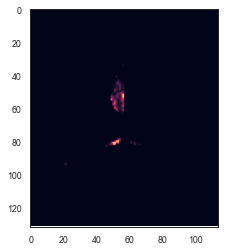

In [7]:
plt.imshow(proj_grid[:,20,:])

In [8]:
proj_grid[:,20,:].max()

0.043983847

In [9]:
proj_grid[:,20,:][50,50]

0.0004225797

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

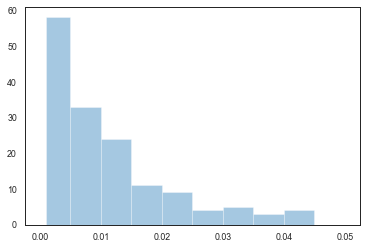

In [10]:
bins = [0.001, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]
sns.distplot(proj_grid[:,20,:].flatten(), bins = bins, kde = False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

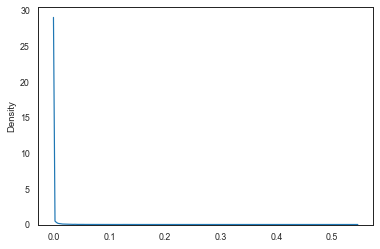

In [11]:
bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
sns.distplot(proj_grid.flatten(), bins = bins, hist = False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

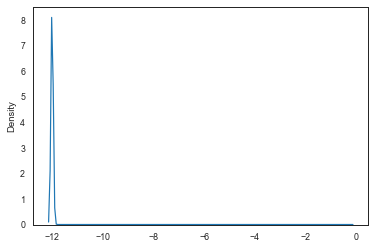

In [12]:
bins = [-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1]
sns.distplot(np.log10(proj_grid.flatten()+1e-12), bins = bins, hist = False)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

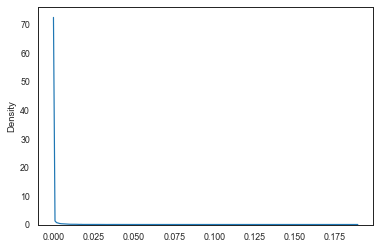

In [13]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
sns.distplot(np.log10(proj_grid.flatten()+1), bins = bins, hist = False)

In [14]:
td_experiments = pd.DataFrame(mcc.get_experiments(cre=['Ai75(RCL-nt)']))

In [15]:
td_ids = td_experiments['id'].unique()

In [16]:
all_voxels = []
valid_voxels = []
percentile = []
for isid in td_ids:
    proj_grid = mcc.get_projection_density(isid)[0]
    proj_grid = proj_grid*iso_mask
    all_voxels.append(proj_grid.flatten())
    proj_grid[np.where(proj_grid < 6e-3)] = 0
    valid_voxels.append(proj_grid[proj_grid > 0])
    percentile.append(np.percentile(proj_grid, 95))

2020-11-19 19:55:28,123 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/578332611?image=projection_density&resolution=100
2020-11-19 19:55:29,237 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/614435699?image=projection_density&resolution=100
2020-11-19 19:55:29,697 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/475828414?image=projection_density&resolution=100
2020-11-19 19:55:30,020 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/613898292?image=projection_density&resolution=100
2020-11-19 19:55:30,519 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/605092364?image=projection_density&resolution=100
2020-11-19 19:55:31,387 allensdk.api.api.retrieve_

2020-11-19 19:56:05,408 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/555012592?image=projection_density&resolution=100
2020-11-19 19:56:06,173 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/528741104?image=projection_density&resolution=100
2020-11-19 19:56:07,724 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/561506791?image=projection_density&resolution=100
2020-11-19 19:56:12,201 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/589702885?image=projection_density&resolution=100
2020-11-19 19:56:15,516 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/572390577?image=projection_density&resolution=100
2020-11-19 19:56:17,200 allensdk.api.api.retrieve_

2020-11-19 19:56:57,918 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/478678606?image=projection_density&resolution=100
2020-11-19 19:56:58,337 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/478877019?image=projection_density&resolution=100
2020-11-19 19:56:59,611 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/479115470?image=projection_density&resolution=100
2020-11-19 19:57:00,545 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/592522663?image=projection_density&resolution=100
2020-11-19 19:57:00,873 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/571647261?image=projection_density&resolution=100
2020-11-19 19:57:01,567 allensdk.api.api.retrieve_

2020-11-19 19:57:31,701 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/561910766?image=projection_density&resolution=100
2020-11-19 19:57:32,193 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/607052300?image=projection_density&resolution=100
2020-11-19 19:57:32,521 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/475617622?image=projection_density&resolution=100
2020-11-19 19:57:33,940 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/571816813?image=projection_density&resolution=100
2020-11-19 19:57:34,637 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/561918178?image=projection_density&resolution=100
2020-11-19 19:57:35,371 allensdk.api.api.retrieve_

2020-11-19 19:58:09,671 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/617901499?image=projection_density&resolution=100
2020-11-19 19:58:10,400 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/563731437?image=projection_density&resolution=100
2020-11-19 19:58:10,894 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/666090944?image=projection_density&resolution=100
2020-11-19 19:58:12,214 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/496964969?image=projection_density&resolution=100


In [17]:
all_voxels = [item for sublist in all_voxels for item in sublist]
valid_voxels = [item for sublist in valid_voxels for item in sublist]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

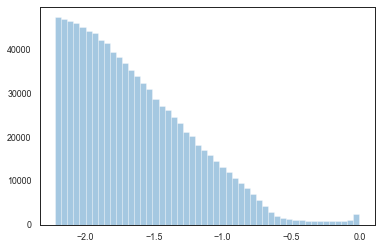

In [18]:
sns.distplot(np.log10(valid_voxels), kde = False)

<AxesSubplot:>

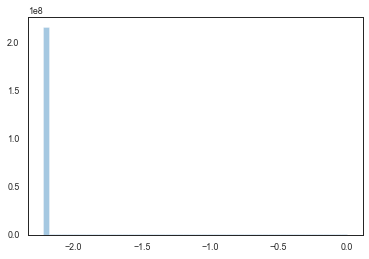

In [19]:
sns.distplot([np.log10(voxel + 6e-3) for voxel in all_voxels], kde = False)

In [20]:
np.unique(percentile)

array([0.])

In [21]:
np.mean(percentile)

0.0

<AxesSubplot:>

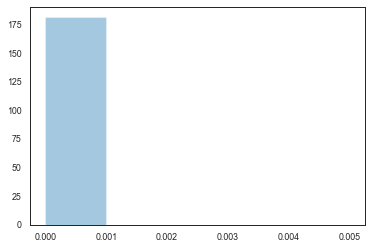

In [22]:
bins = [0, 1e-3, 2e-3, 3e-3, 4e-3, 5e-3]
sns.distplot(percentile, bins = bins, kde = False)

In [23]:
proj_grid[np.where(proj_grid < 1e-3)] = 0

<AxesSubplot:>

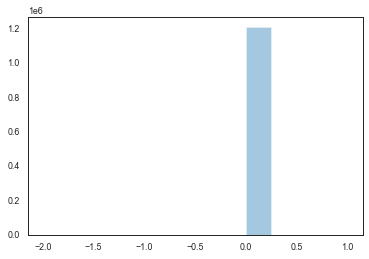

In [24]:
bins = [-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
sns.distplot(proj_grid.flatten(), bins = bins, kde = False)

<AxesSubplot:>

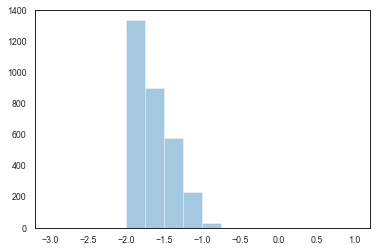

In [25]:
bins = [-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
sns.distplot(np.log10(proj_grid.flatten()+1e-3), bins = bins, kde = False)